In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Since this notebook is inside notebooks/, go up one level to reach data/
df = pd.read_csv("../data/patient_data.csv")
df.head()


,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [8]:
df.rename(columns={'C':'Gender'}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


In [10]:
df.shape

(1825, 14)

In [27]:
df.isnull().sum()

Gender             0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64

In [28]:
df['Stages'].unique()


array(['HYPERTENSION (Stage-1)', 'HYPERTENSION (Stage-2)',
       'HYPERTENSIVE CRISIS', 'HYPERTENSION (Stage-2).',
       'HYPERTENSIVE CRISI', 'NORMAL'], dtype=object)

In [ ]:
df['Stages'].replace({
    'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS',
    'HYPERTENSION (Stage-2).': 'HYPERTENSION (Stage-2)'
}, inplace=True)


In [12]:
df['Stages'] = df['Stages'].replace({
    'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS',
    'HYPERTENSION (Stage-2).': 'HYPERTENSION (Stage-2)'
})


In [13]:
df['Stages'].unique()


array(['HYPERTENSION (Stage-1)', 'HYPERTENSION (Stage-2)',
       'HYPERTENSIVE CRISIS', 'NORMAL'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Stages'] = le.fit_transform(df['Stages'])


In [15]:
df['Stages'].unique()


array([0, 1, 2, 3])

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Stages'] = le.fit_transform(df['Stages'])


In [17]:
df['Stages'].unique()


array([0, 1, 2, 3])

In [18]:
df.describe()

,Stages
count,1825.000000
mean,1.145205
std,1.096876
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


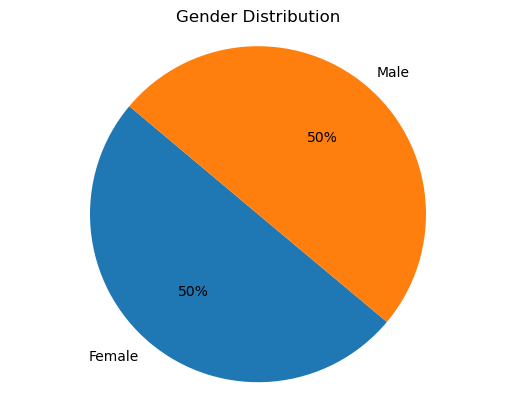

In [37]:
gender_counts = df['Gender'].value_counts()

#plotting the pie chart 
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.0f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

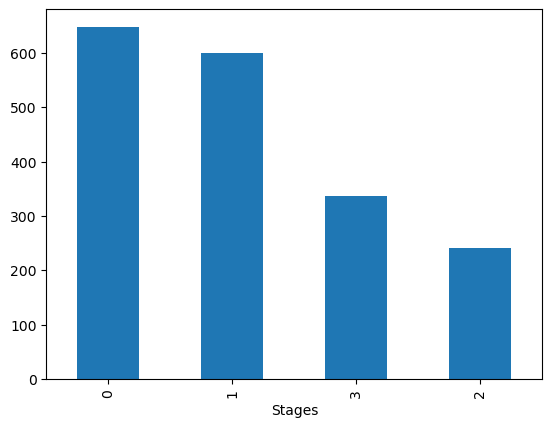

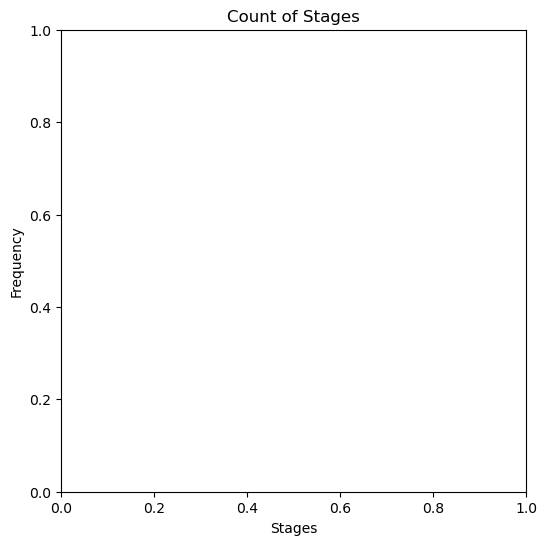

In [38]:
frequency = df['Stages'].value_counts()

frequency.plot(kind='bar')
plt.figure(figsize=(6,6))
plt.xlabel('Stages')
plt.ylabel('Frequency')
plt.title('Count of Stages')
plt.show()

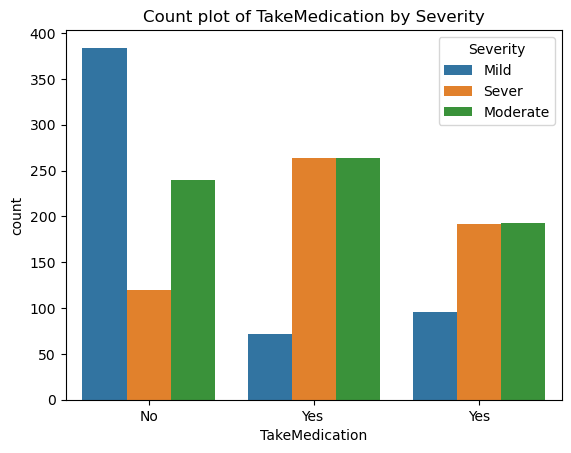

In [39]:
sns.countplot(x='TakeMedication', hue='Severity', data=df)
plt.title('Count plot of TakeMedication by Severity')
plt.show()

In [ ]:
sns.pairplot(df[['Age', 'Systolic', 'Diastolic']])
plt.show()

In [41]:
#splitting the data into X and Y
x=df.drop('Stages' , axis = 1)
x

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,Female,35-50,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No
1821,Male,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No
1822,Female,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No
1823,Male,65+,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No


In [42]:
y = df['Stages']
y

0       0
1       0
2       0
3       0
4       0
       ..
1820    3
1821    3
1822    3
1823    3
1824    3
Name: Stages, Length: 1825, dtype: int64

In [19]:
# X = all columns except 'Stages'
X = df.drop('Stages', axis=1)

# Y = only the target column
Y = df['Stages']


In [56]:
from sklearn.preprocessing import LabelEncoder

# make a copy to be safe
df_encoded = df.copy()

# find all object (string) columns
cat_cols = df_encoded.select_dtypes(include=['object']).columns

# apply label encoding
le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))


In [57]:
X = df_encoded.drop('Stages', axis=1)
Y = df_encoded['Stages']


In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9863013698630136

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       139
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00        46
           3       0.92      1.00      0.96        60

    accuracy                           0.99       365
   macro avg       0.98      0.99      0.99       365
weighted avg       0.99      0.99      0.99       365



In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# initialize model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# train
random_forest_model.fit(x_train, y_train)

# predict
y_pred = random_forest_model.predict(x_test)

# evaluate
acc_rf = accuracy_score(y_test, y_pred)
c_rf = classification_report(y_test, y_pred)

print("Accuracy Score: ", acc_rf)
print("\nClassification Report:\n", c_rf)


Accuracy Score:  1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        60

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# initialize model
mNB = MultinomialNB()

# train
mNB.fit(x_train, y_train)

# predict
y_pred = mNB.predict(x_test)

# evaluate
acc_mnb = accuracy_score(y_test, y_pred)
c_mnb = classification_report(y_test, y_pred)

print("Accuracy Score: ", acc_mnb)
print("\nClassification Report:\n", c_mnb)


Accuracy Score:  0.8438356164383561

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       139
           1       0.88      0.96      0.92       120
           2       0.87      0.72      0.79        46
           3       0.71      0.65      0.68        60

    accuracy                           0.84       365
   macro avg       0.83      0.80      0.81       365
weighted avg       0.84      0.84      0.84       365



In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# initialize model
gnb = GaussianNB()

# train
gnb.fit(x_train, y_train)

# predict
y_pred = gnb.predict(x_test)

# evaluate
acc_gnb = accuracy_score(y_test, y_pred)
c_gnb = classification_report(y_test, y_pred)

print("Accuracy Score: ", acc_gnb)
print("\nClassification Report:\n", c_gnb)


Accuracy Score:  1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        60

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# initialize model
mnb = MultinomialNB()

# train
mnb.fit(x_train, y_train)

# predict
y_pred = mnb.predict(x_test)

# evaluate
acc_mnb = accuracy_score(y_test, y_pred)
c_mnb = classification_report(y_test, y_pred)

print("Accuracy Score: ", acc_mnb)
print("\nClassification Report:\n", c_mnb)


Accuracy Score:  0.8438356164383561

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       139
           1       0.88      0.96      0.92       120
           2       0.87      0.72      0.79        46
           3       0.71      0.65      0.68        60

    accuracy                           0.84       365
   macro avg       0.83      0.80      0.81       365
weighted avg       0.84      0.84      0.84       365



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)
y_pred_lr = log_reg.predict(x_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# 2. Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# 3. Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# 4. Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nb = gnb.predict(x_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

# 5. Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred_mnb = mnb.predict(x_test)
acc_mnb = accuracy_score(y_test, y_pred_mnb)

print("✅ Models trained and accuracies calculated")


In [ ]:
import pandas as pd

model = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree Classifier',
              'RandomForest Classifier','Gaussian Naive Bayes',
              'Multinomial Naive Bayes'],
    'Score': [acc_lr, acc_dt, acc_rf, acc_nb, acc_mnb],
})

print(model)


In [ ]:
import pickle
import warnings

# Save trained random forest model
pickle.dump(rf, open("model.pkl", "wb"))


In [75]:
loaded_model = pickle.load(open("model.pkl", "rb"))


In [ ]:
import pickle

# trained model object is called "model"
pickle.dump(model, open("model.pkl", "wb"))

print("✅ Model saved as model.pkl")
